In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

# Activity only predictions

Text(0.5, 1, 'Validation predictions')

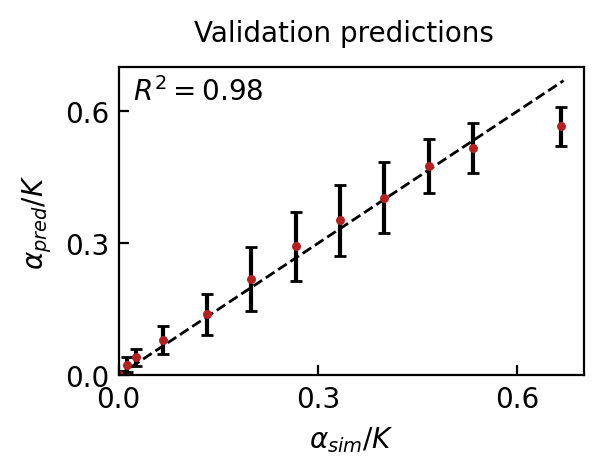

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

def plot_activity(df):
    fig, ax = plt.subplots(1, 1, dpi=200, figsize=(3, 2))

    # Parameters are \alpha / K
    df.z_true = df.z_true / 0.075
    df.z_pred = df.z_pred / 0.075

    df_grouped = df.groupby('z_true').agg({
        'z_pred': ['mean', 'std']
    }).reset_index()

    # Activity plot
    ax.plot([0, 0.67], [0, 0.67], color='black', linestyle='--', linewidth=1, zorder=-2)
    ax.errorbar(
        x=df_grouped['z_true'], 
        y=df_grouped[('z_pred', 'mean')],
        yerr=df_grouped[('z_pred', 'std')],
        capsize=2, color='black', linestyle='', zorder=-1)
    ax.scatter(
        x=df_grouped['z_true'], 
        y=df_grouped[('z_pred', 'mean')],
        color='firebrick', s=5)
    
    r2 = r2_score(df_grouped['z_true'], df_grouped[('z_pred', 'mean')])
    ax.text(0.03, 0.97, f'$R^2 = {r2:.2f}$', 
               va='top', ha='left', 
               transform=ax.transAxes)

    ax.set(xlim=[0, 0.7], xticks=[0, 0.3, 0.6], xlabel=r'$\alpha_{sim} / K$')
    ax.set(ylim=[0, 0.7], yticks=[0, 0.3, 0.6], ylabel=r'$\alpha_{pred} / K$')
    ax.tick_params(which='both', direction='in')
    
    return fig

model_dir = '../models/ParameterEstimator_Activity_v0/'
val_preds = pd.read_csv(f'{model_dir}/validation_predictions.csv')
fig = plot_activity(val_preds)
fig.suptitle('Validation predictions', y=1, fontsize=10)

Text(0.5, 1, 'Validation predictions')

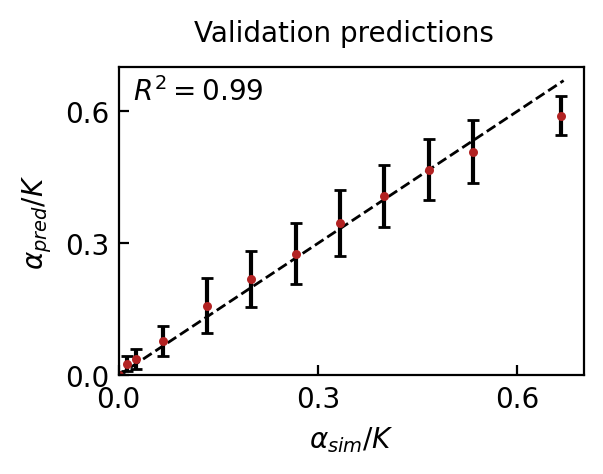

In [3]:
model_dir = '../models/ParameterEstimator_Activity_v1/'
val_preds = pd.read_csv(f'{model_dir}/validation_predictions.csv')
fig = plot_activity(val_preds)
fig.suptitle('Validation predictions', y=1, fontsize=10)

# Activity and elastic modulus predictions

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import os

def plot_activity_elasticity(df):
    fig, ax = plt.subplots(1, 2, dpi=200, figsize=(5, 2))

    # Normalize parameters
    df.k_pred = df.k_pred / 0.125 #df.k_true.mean()
    df.k_true = df.k_true / 0.125 #df.k_true.mean()
    df.z_pred = df.z_pred / 0.025 #df.z_true.mean()
    df.z_true = df.z_true / 0.025 #df.z_true.mean()

    # Aggregate prediction statistics
    df_grouped = df.groupby(['k_true', 'z_true']).agg({
        'z_pred': ['mean', 'std'],
        'k_pred': ['mean', 'std'],
    }).reset_index()

    # Activity plot
    
    ax[0].plot([0, 2], [0, 2], color='black', linestyle='--', linewidth=1, zorder=-2)
    # Draw errorbars then marker over them
    ax[0].errorbar(
        x=df_grouped['z_true'], 
        y=df_grouped[('z_pred', 'mean')],
        yerr=df_grouped[('z_pred', 'std')],
        capsize=2, color='black', linestyle='', zorder=-1)
    c = ax[0].scatter(
        x=df_grouped['z_true'], 
        y=df_grouped[('z_pred', 'mean')],
        c=df_grouped['k_true'], 
        cmap='Reds', vmin=0.5, vmax=1.5, s=5)

    
    cbar = fig.colorbar(c, ax=ax[0], ticks=[0.5, 1, 1.5])
    cbar.ax.set_ylabel(r'$K_{sim} / \bar{K}$')
    ax[0].set(xlim=[0, 2], xticks=[0, 1, 2], xlabel=r'$\alpha_{sim} / \bar{\alpha}$')
    ax[0].set(ylim=[0, 2], yticks=[0, 1, 2], ylabel=r'$\alpha_{pred} / \bar{\alpha}$')

    r2 = r2_score(df_grouped['z_true'], df_grouped[('z_pred', 'mean')])
    ax[0].text(0.03, 0.97, f'$R^2 = {r2:.2f}$', 
               va='top', ha='left', 
               transform=ax[0].transAxes)
    
    # Elasticity plot

    # Draw errorbars then marker over them
    ax[1].plot([0.5, 1.5], [0.5, 1.5], color='black', linestyle='--', linewidth=1, zorder=-2)

    ax[1].errorbar(
        x=df_grouped['k_true'], 
        y=df_grouped[('k_pred', 'mean')],
        yerr=df_grouped[('k_pred', 'std')],
        capsize=2, color='black', linestyle='', zorder=-1)
    c = ax[1].scatter(
        x=df_grouped['k_true'], 
        y=df_grouped[('k_pred', 'mean')],
        c=df_grouped['z_true'], 
        cmap='Blues', vmin=0, vmax=2, s=5)
    
    cbar = fig.colorbar(c, ax=ax[1], ticks=[0, 1, 2])
    cbar.ax.set_ylabel(r'$\alpha_{sim} / \bar{\alpha}$')
    ax[1].set(xlim=[0.5, 1.5], xticks=[0.5, 1, 1.5], xlabel=r'$K_{sim} / \bar{K}$')
    ax[1].set(ylim=[0.5, 1.5], yticks=[0.5, 1, 1.5], ylabel=r'$K_{pred} / \bar{K}$')

    r2 = r2_score(df_grouped['k_true'], df_grouped[('k_pred', 'mean')])
    ax[1].text(0.03, 0.97, f'$R^2 = {r2:.2f}$', 
               va='top', ha='left', 
               transform=ax[1].transAxes)
    
    for a in ax:
        a.tick_params(which='both', direction='in')

    plt.tight_layout()
    return fig

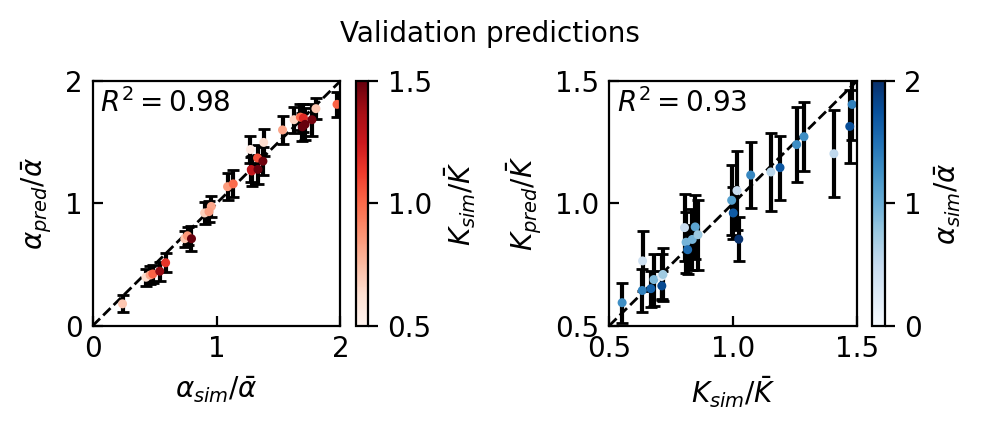

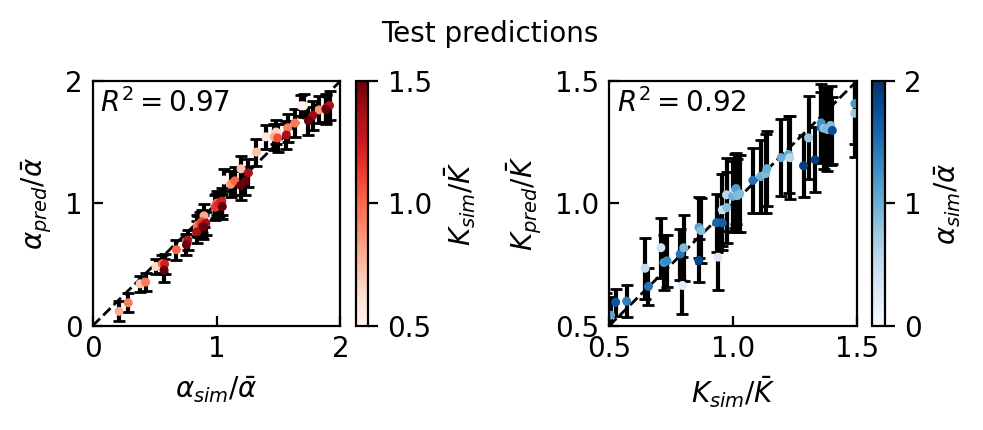

In [5]:
model_dir = '../models/ConvNextParameterEstimator_KZ_v1/'

val_preds = pd.read_csv(f'{model_dir}/validation_predictions.csv')
fig = plot_activity_elasticity(val_preds)
fig.suptitle('Validation predictions', y=1.05, fontsize=10)

if os.path.exists(f'{model_dir}/test_predictions.csv'):
    test_preds = pd.read_csv(f'{model_dir}/test_predictions.csv')
    fig = plot_activity_elasticity(test_preds)
    fig.suptitle('Test predictions', y=1.05, fontsize=10)


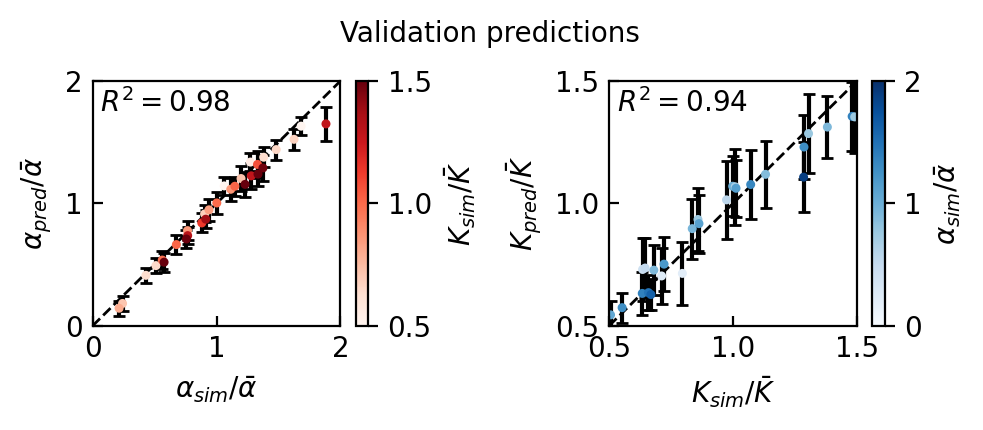

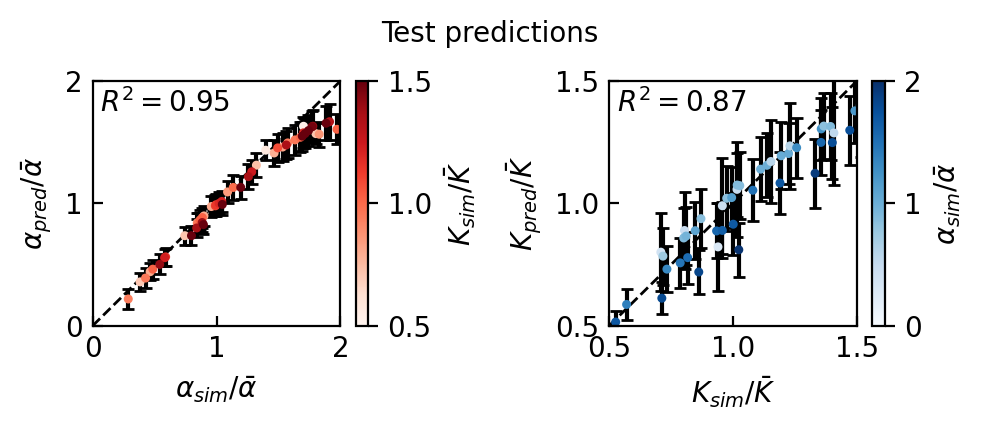

In [6]:
model_dir = '../models/ConvNextParameterEstimator_KZ_v3/'

val_preds = pd.read_csv(f'{model_dir}/validation_predictions.csv')
fig = plot_activity_elasticity(val_preds)
fig.suptitle('Validation predictions', y=1.05, fontsize=10)

if os.path.exists(f'{model_dir}/test_predictions.csv'):
    test_preds = pd.read_csv(f'{model_dir}/test_predictions.csv')
    fig = plot_activity_elasticity(test_preds)
    fig.suptitle('Test predictions', y=1.05, fontsize=10)


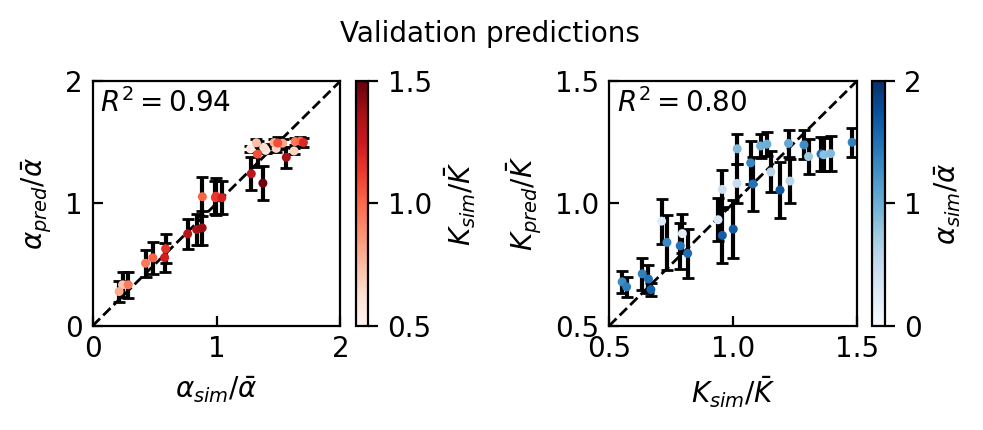

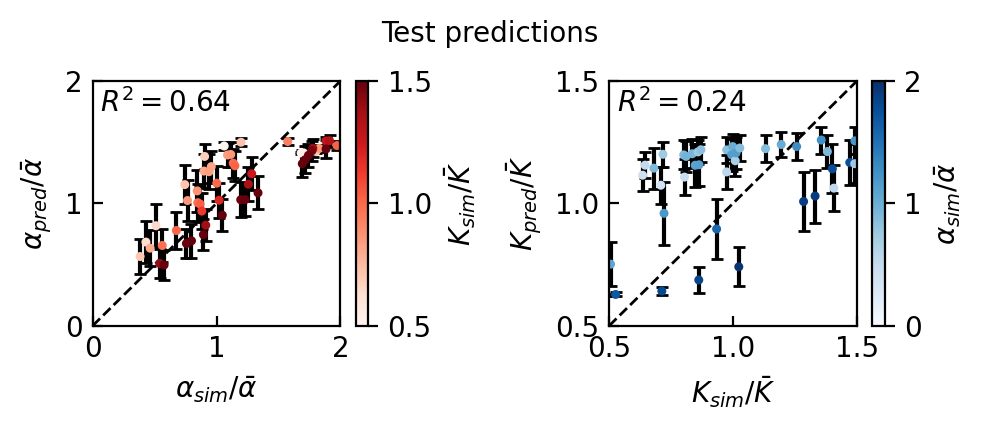

In [7]:
model_dir = '../models/ParameterEstimator_KZ_v5/'

val_preds = pd.read_csv(f'{model_dir}/validation_predictions.csv')
fig = plot_activity_elasticity(val_preds)
fig.suptitle('Validation predictions', y=1.05, fontsize=10)

if os.path.exists(f'{model_dir}/test_predictions.csv'):
    test_preds = pd.read_csv(f'{model_dir}/test_predictions.csv')
    fig = plot_activity_elasticity(test_preds)
    fig.suptitle('Test predictions', y=1.05, fontsize=10)


## Aggregated predictions

Text(0.5, 1.05, 'Test predictions')

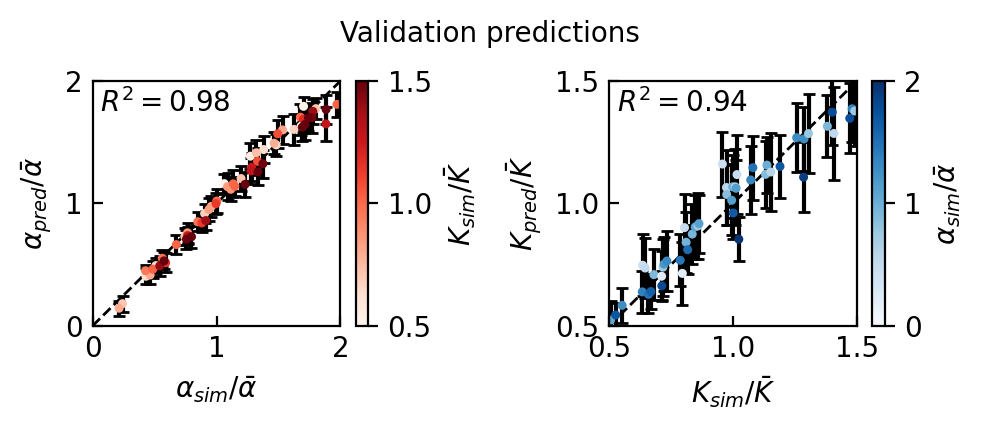

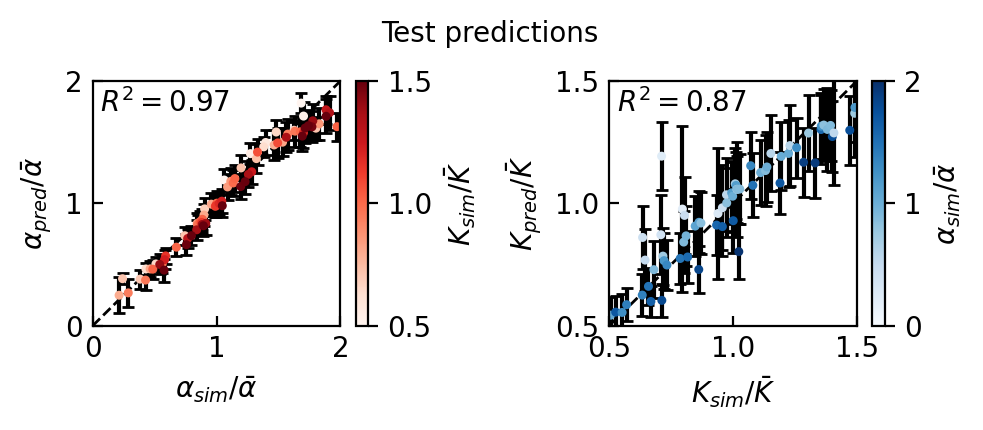

In [8]:
import glob
model_paths = sorted(glob.glob('../models/ConvNextParameterEstimator_KZ_v*'))
df = pd.concat([pd.read_csv(f'{path}/validation_predictions.csv') for path in model_paths], ignore_index=True)
fig = plot_activity_elasticity(df)
fig.suptitle('Validation predictions', y=1.05, fontsize=10)

df = pd.concat([pd.read_csv(f'{path}/test_predictions.csv') for path in model_paths], ignore_index=True)
fig = plot_activity_elasticity(df)
fig.suptitle('Test predictions', y=1.05, fontsize=10)

Text(0.5, 1.05, 'Test predictions')

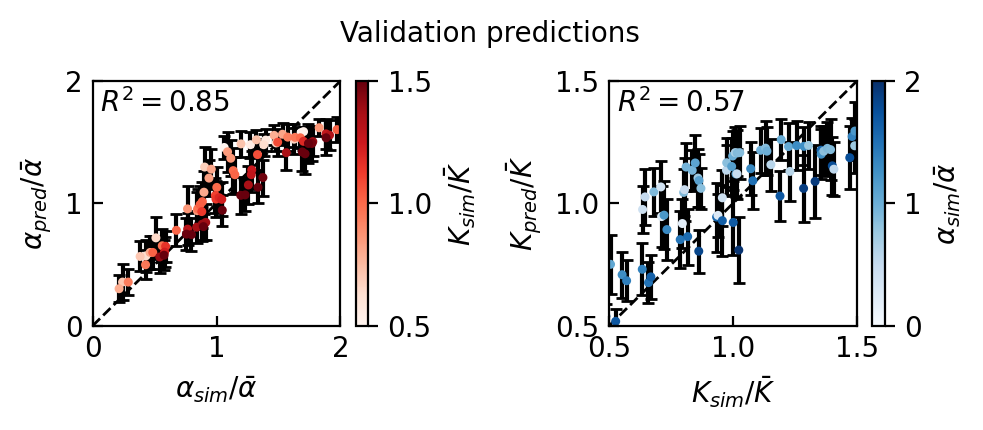

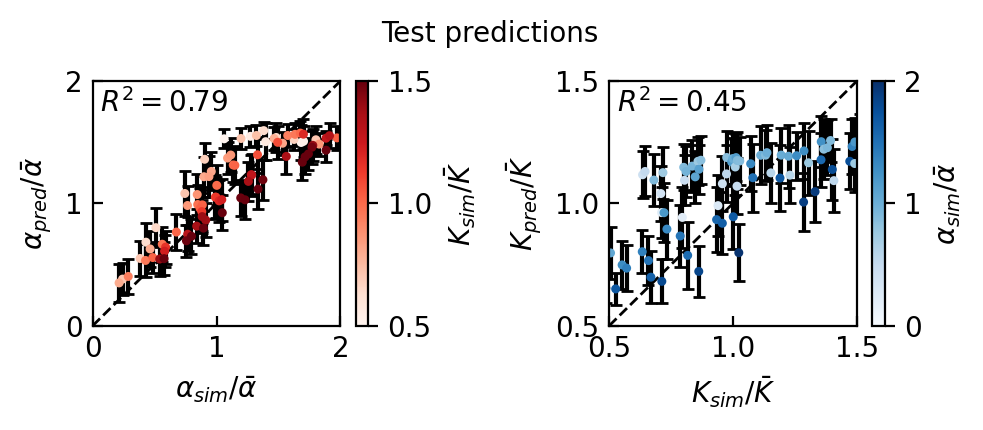

In [9]:
import glob
model_paths = sorted(glob.glob('../models/ParameterEstimator_KZ_v*'))
df = pd.concat([pd.read_csv(f'{path}/validation_predictions.csv') for path in model_paths], ignore_index=True)
fig = plot_activity_elasticity(df)
fig.suptitle('Validation predictions', y=1.05, fontsize=10)

df = pd.concat([pd.read_csv(f'{path}/test_predictions.csv') for path in model_paths], ignore_index=True)
fig = plot_activity_elasticity(df)
fig.suptitle('Test predictions', y=1.05, fontsize=10)

# Plot the overall parameter space

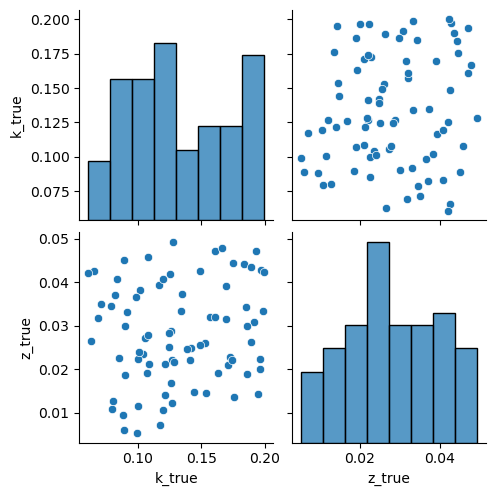

In [10]:
import glob
import os
import parse
import seaborn as sns
paths = glob.glob('../../data/elastic_activity_assay/*.hdf5')
k_true = []
z_true = []
koverz = []
index = []

for path in paths:
    k, z = parse.parse('K_{:f}_Z_{:f}.hdf5', os.path.basename(path))
    k_true.append(k)
    z_true.append(z)
    index.append(os.path.basename(path))

df = pd.DataFrame({'k_true': k_true, 'z_true': z_true}, index=index)
sns.pairplot(df)